In [1]:
import pandas as pd
import numpy as np
import spacy
import gensim
import os
import codecs
import json
import re
from bs4 import BeautifulSoup

In [68]:
restaurant_ids1 = []

# open the businesses file
with open('./data/yelp_academic_dataset_business.json', encoding='utf_8') as f:
    
    # iterate through each line (json record) in the file
    for line in f:
        
        # convert the json record to a Python dict
        business = json.loads(line)
        
        # if this business is not a restaurant, skip to the next one
        if business["categories"] is not None and "Restaurants" in business["categories"]:
            # add the restaurant business id to our restaurant_ids set
            restaurant_ids1.append((business['business_id'], business['city'], business['state'], business['categories']))
        else:
            continue


In [69]:
business

{'address': '4550 Cactus Road, Suite 318',
 'attributes': ['BikeParking: True',
  'BusinessAcceptsCreditCards: True',
  "BusinessParking: {'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",
  'RestaurantsPriceRange2: 3'],
 'business_id': 'a048R60CLFeObJ3mhHdPRg',
 'categories': ['Shopping', 'Mobile Phones'],
 'city': 'Phoenix',
 'hours': ['Monday 10:0-21:0',
  'Tuesday 10:0-21:0',
  'Wednesday 10:0-21:0',
  'Thursday 10:0-21:0',
  'Friday 10:0-21:0',
  'Saturday 10:0-21:0',
  'Sunday 11:0-18:0'],
 'is_open': 1,
 'latitude': 33.6021726,
 'longitude': -111.9836359,
 'name': 'T-Mobile',
 'neighborhood': '',
 'postal_code': '85032',
 'review_count': 5,
 'stars': 3.0,
 'state': 'AZ',
 'type': 'business'}

In [70]:
restaurant_ids1[0:10]

[('EDqCEAGXVGCH4FJXgqtjqg',
  'Toronto',
  'ON',
  ['Restaurants', 'Pizza', 'Chicken Wings', 'Italian']),
 ('GDnbt3isfhd57T1QqU6flg',
  'Scottsdale',
  'AZ',
  ['Tex-Mex', 'Mexican', 'Fast Food', 'Restaurants']),
 ('42romV8altAeuZuP2OC1gw',
  'Henderson',
  'NV',
  ['Hawaiian', 'Restaurants', 'Barbeque']),
 ('DNyYOxVAfu0oUcPNL1ljCQ', 'Boucherville', 'QC', ['Restaurants', 'Cafes']),
 ('a1Ba6XeIOP48e64YFD0dMw',
  'Montréal',
  'QC',
  ['Sandwiches', 'Breakfast & Brunch', 'Salad', 'Restaurants']),
 ('826djy6K_9Fp0ptqJ2_Yag',
  'Toronto',
  'ON',
  ['Fast Food', 'Mexican', 'Restaurants']),
 ('Mi5uhdFB9OJteXPd0_IKfw',
  'Glendale',
  'AZ',
  ['Restaurants', 'Italian', 'Seafood']),
 ('Uxh0fXFH_QQBivRnIBpdiw',
  'Amherst',
  'OH',
  ['Restaurants', 'Mexican', 'American (Traditional)']),
 ('YPavuOh2XsnRbLfl0DH2lQ',
  'Phoenix',
  'AZ',
  ['Restaurants', 'Waffles', 'Southern', 'Soul Food']),
 ('saWZO6hB4B8P-mIzS1--Xw',
  'Las Vegas',
  'NV',
  ['Persian/Iranian',
   'Restaurants',
   'Ethnic Fo

In [4]:
review_json_filepath = os.path.join('./data/',
                                    'yelp_academic_dataset_review.json')

rest_sample = np.random.choice(restaurant_ids1, 1000)

rests = []
with codecs.open(review_json_filepath, encoding='utf_8') as f:
    for line in f:
        review = json.loads(line)
        if review['business_id'] in rest_sample:
            rests.append(review)
        else:
            continue
            

In [5]:

# print the number of unique restaurant ids in the dataset
print('{:,}'.format(len(restaurant_ids1)), u'restaurants in the dataset.')

48,485 restaurants in the dataset.


#checking overlap in two methods
missing = []
with open('./data/yelp_academic_dataset_business.json', encoding='utf_8') as f:
    
    # iterate through each line (json record) in the file
    for line in f:
        business = json.loads(line)
        if business['business_id'] in diff:
            missing.append(business)
            
df = pd.DataFrame(missing)
            
        
    


In [6]:
reviews = pd.DataFrame(rests)

In [7]:
reviews.head(6)

,business_id,cool,date,funny,review_id,stars,text,type,useful,user_id
0,6BSl6vLEyZvro_YIqorxEQ,0,2014-09-12,0,44Is9Ey7bTOgfMFuTlJd7A,4,This is an awesome plan for a fun night at the...,review,0,6dK2EHJuDfKOWpvUX7-G-Q
1,AsmN2ZqAlO9gl3EQpwrquQ,0,2011-11-18,0,EkPw5n_6Ma8pk-CAAiE8-A,5,Schwäbische Küche mit saisonalen Spezialitäten...,review,0,Als6BovT3ezHPQVVqibWCg
2,AsmN2ZqAlO9gl3EQpwrquQ,0,2011-01-29,0,gVYFZ5toWhHQRMSMd-fW9w,4,Gute Gaststätte mit gutbürgerlichen Gerichten....,review,0,ODCjj_xgQnC7j-sTGq3UoA
3,AsmN2ZqAlO9gl3EQpwrquQ,0,2011-08-27,0,AaVy74wTrW8PUKbTGMKhpg,1,Wir haben uns kürzlich auf Fisch während der F...,review,0,-CbLvRrBKA3530I4KnpT2w
4,H8Ydr14l2ZzUAuxJJR13hw,0,2016-02-01,0,hlVIlXyGwtVXVcn570wEUQ,5,Great family owned breakfast place for the qua...,review,0,pf9mCNF9M38GVQO4cml7bQ
5,H8Ydr14l2ZzUAuxJJR13hw,0,2016-08-05,0,Mw4knbmRnmL3zJJ90ptIuQ,3,The only reason I gave it a 3 was because the ...,review,0,IzLj5VJhh63X5X89_ZqZdw


In [8]:
reviews.shape

(53425, 10)

In [9]:
nlp = spacy.load('en')

In [10]:
def clean_text(text):
    
    # Remove HTML
    text = BeautifulSoup(text, "html.parser").get_text()
    
    #removes numbers, symbols, nextline symbols 
    
    text = re.sub("[^a-zA-Z' ]"," ", str(text))
    text = re.sub("'s", '', text)
    text = text.replace("\n", '').replace('  ', ' ').lower().strip('.')
    text = nlp(text)
    
    words=[]
    for word in text:
        if word.pos_ != 'PUNCT' and word.lemma_ != '-PRON-' and not word.is_space:
            words.append(word.lemma_)
    
    unigrams=[]
    for word in words:
        if word not in spacy.en.language_data.STOP_WORDS:
            unigrams.append(word)
            
            
    return unigrams

## Phrase modeling

In [11]:
text = reviews['text'][500]
samp_text = re.sub("[^a-zA-Z' ]", " ", str(text))
samp_text = samp_text.replace("\n\n", '').lower().strip().replace('  ', ' ').split('. ')
print(text)
samp_text


Nachdem wir so viele positive Kommentare gelesen hatten freuten wir uns sehr auf einen gemütlichen Abend mit gutem Essen, natürlich reservierten wir einen Tisch welcher uns zwischen 18 und 20uhr zugesichert wurde.

Als wir nun um 18uhr im noch komplett leeren Restaurant eintrafen, stellte sich heraus das es ein organisatorisches problem gab und unser tisch nicht fertig war. Also standen wir ersteinmal zwischen lauter leeren Tischen für ca. 10 min herum bis wir uns setzen konnten. Ausserdem wurde uns vom Koch/Inhaber mitgeteilt dass wir den Tisch doch nur bis 19.30 haben könnten da er nach unserer Reservierung noch eine weitere angenommen hätte. Ich war schon etwas von der Arroganz überrascht aber nun gut, vielleicht würde das Essen ja für alles entschädigen.

Für mich und die 2. Dame am Tisch war es etwas schwierig ein Hauptgericht zu finden also fragten wir ob wir evtl. eine der Vorspeisen als Hauptgericht haben könnten, also 2 Vorspeisen wir wären auch mehr als gewillt gewesen für ei

['nachdem wir so viele positive kommentare gelesen hatten freuten wir uns sehr auf einen gem tlichen abend mit gutem essen nat rlich reservierten wir einen tisch welcher uns zwischen  und  uhr zugesichert wurde  als wir nun um  uhr im noch komplett leeren restaurant eintrafen stellte sich heraus das es ein organisatorisches problem gab und unser tisch nicht fertig war also standen wir ersteinmal zwischen lauter leeren tischen f r ca   min herum bis wir uns setzen konnten ausserdem wurde uns vom koch inhaber mitgeteilt dass wir den tisch doch nur bis    haben k nnten da er nach unserer reservierung noch eine weitere angenommen h tte ich war schon etwas von der arroganz berrascht aber nun gut vielleicht w rde das essen ja f r alles entsch digen  f r mich und die  dame am tisch war es etwas schwierig ein hauptgericht zu finden also fragten wir ob wir evtl eine der vorspeisen als hauptgericht haben k nnten also  vorspeisen wir w ren auch mehr als gewillt gewesen f r eine gr ssere portion e

In [12]:
test = nlp(reviews['text'][5])
print(pd.DataFrame([(word, word.pos_, word.tag_, word.lemma_, word.orth_) for word in test], columns = ['word', 'pos', 'tag', 'lemma', 'orth']))

             word    pos  tag         lemma          orth
0             The    DET   DT           the           The
1            only    ADJ   JJ          only          only
2          reason   NOUN   NN        reason        reason
3               I   PRON  PRP        -PRON-             I
4            gave   VERB  VBD          give          gave
5              it   PRON  PRP        -PRON-            it
6               a    DET   DT             a             a
7               3    NUM   CD             3             3
8             was   VERB  VBD            be           was
9         because    ADP   IN       because       because
10            the    DET   DT           the           the
11           cook   NOUN   NN          cook          cook
12      obviously    ADV   RB     obviously     obviously
13          knows   VERB  VBZ          know         knows
14            how    ADV  WRB           how           how
15             to   PART   TO            to            to
16           c

In [13]:
print(clean_text(reviews['text'][5]))

['reason', 'cook', 'obviously', 'know', 'cook', 'sunny', 'egg', 'properly', 'wait', 'staff', 'enthusiastic', 'slogan', 'reserve', 'right', 'smile', 'abide', 'rule', 'people', 'place', 'forever', 'offer', 'coffee', 'think', 'interested', 'chat', 'friend', 'rat', 'high', 'food', 'good', 'wait', 'staff', 'needs', 'work', 'like', 'degree', 'place', 'weak', 'cost', 'place']


In [14]:
reviews_cleaned = reviews['text'].apply(clean_text)
len(reviews_cleaned)

/home/ryeyoo/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://jentalkstoomuch.com/2016/08/portland-variety-insulting-people-one-pregnant-woman-at-a-time/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


53425

In [15]:
from gensim.models import Phrases

#unigrams = [review.split(' ') for review in reviews_cleaned]
unigrams = reviews_cleaned
reviews_cleaned.head(10)

0    [awesome, plan, fun, night, ballpark, buy, che...
1    [schw, bische, k, che, mit, saisonalen, spezia...
2    [gute, gastst, tte, mit, gutb, rgerlichen, ger...
3    [wir, haben, un, k, rzlich, auf, fisch, w, hre...
4    [great, family, breakfast, place, quality, qua...
5    [reason, cook, obviously, know, cook, sunny, e...
6    [inspire, solid, breakfast, option, quick, han...
7    [time, fine, try, ham, egg, fried, salty, lunc...
8    [jack, broccoli, omelette, club, sandwich, pre...
9    [daybreak, makeover, bright, yellow, half, wal...
Name: text, dtype: object

In [16]:
len(unigrams)

53425

In [17]:
bigrams = gensim.models.phrases.Phraser(Phrases(unigrams))

In [18]:
bigram_sents = []
for sent in unigrams:
   bigram_sents.append(bigrams[sent])

In [19]:
bigram_sents[0]

['awesome',
 'plan',
 'fun',
 'night',
 'ballpark',
 'buy',
 'cheap',
 'seat',
 'possible',
 'stay',
 'watch_game',
 'compare',
 'food',
 'ballpark',
 'bargain',
 'especially',
 'save',
 'ticket']

In [20]:
trigrams = Phrases(bigram_sents)

In [21]:

trigram_sents =''
for bigram in bigram_sents:
    trigram_sents += ' '.join(trigrams[bigram])

/home/ryeyoo/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:274: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [22]:
#span = re.search('mastro_', trigram_sents).span()
#print(span)

In [23]:
#trigram_sents[span[0]:span[1]+500]

In [24]:
trigram_phrases = [trigrams[bigram] for bigram in bigram_sents]

/home/ryeyoo/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:274: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [25]:
import re

multigram_list = re.findall('\w*_\w*_\w*', trigram_sents)

In [26]:
from collections import Counter

Counter(multigram_list).most_common(40)

[('sweet_potato_fry', 294),
 ('mac_n_cheese', 244),
 ('steak_n_shake', 234),
 ('seat_right_away', 176),
 ('big_ass_burger', 137),
 ('pull_pork_sandwich', 123),
 ('bloody_mary_bar', 121),
 ('hot_sour_soup', 119),
 ('brussel_sprout_nachos', 112),
 ('staff_super_friendly', 108),
 ('prix_fixe_menu', 106),
 ('bistro_la_bon', 104),
 ('http_www_yelp_com', 103),
 ('look_forward_try', 101),
 ('p_pang_pong', 99),
 ('happy_hour_special', 87),
 ('wait_long_time', 86),
 ('casa_di_amore', 86),
 ('creme_br_l_e', 85),
 ('vanilla_ice_cream', 80),
 ('carne_asada_fry', 79),
 ('service_bit_slow', 77),
 ('soft_shell_crab', 75),
 ('staff_friendly_helpful', 75),
 ('thin_crust_pizza', 70),
 ('new_york_style', 69),
 ('course_tasting_menu', 66),
 ('ping_pang_pong', 66),
 ('staff_friendly_attentive', 63),
 ('egg_drop_soup', 62),
 ('spicy_tuna_roll', 62),
 ('high_end_restaurant', 62),
 ('au_gratin_potato', 58),
 ('wait_minute_seat', 57),
 ('jean_philippe_patisserie', 57),
 ('bone_rib_eye', 57),
 ('gluten_free_piz

## Topic modeling

In [27]:
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore
from gensim import models
#import pyLDAvis
#import pyLDAvis.gensim
import warnings


In [28]:
trigram_dictionary = Dictionary(trigram_phrases)
print(trigram_dictionary)
#print(trigram_dictionary.token2id)

Dictionary(59247 unique tokens: ['awesome', 'plan', 'fun', 'night', 'ballpark']...)


In [29]:
# must give doc2bow the tokenized list from trigrams
corpus_yelp = [trigram_dictionary.doc2bow(phrase) for phrase in trigram_phrases]


In [30]:
tfidf_yelp = models.TfidfModel(corpus_yelp)
tfidf_corpus = tfidf_yelp[corpus_yelp]

In [31]:
lda = LdaMulticore(corpus_yelp, num_topics = 20, id2word=trigram_dictionary, workers = 12, chunksize=10000, passes=2)

#lda = gensim.models.ldamodel.LdaModel(corpus=tfidf_corpus, id2word=trigram_dictionary, num_topics=20, update_every=1, chunksize=10000, passes=2)


In [32]:
lda.show_topics(num_topics=-1, num_words=4)

[(0, '0.041*"good" + 0.019*"place" + 0.016*"food" + 0.011*"great"'),
 (1, '0.024*"good" + 0.012*"food" + 0.010*"place" + 0.009*"like"'),
 (2, '0.032*"food" + 0.021*"good" + 0.017*"come" + 0.014*"order"'),
 (3, '0.025*"good" + 0.014*"food" + 0.013*"place" + 0.010*"love"'),
 (4, '0.021*"good" + 0.020*"great" + 0.015*"service" + 0.014*"place"'),
 (5, '0.023*"food" + 0.021*"great" + 0.017*"good" + 0.012*"place"'),
 (6, '0.021*"order" + 0.016*"place" + 0.014*"good" + 0.013*"great"'),
 (7, '0.022*"good" + 0.020*"order" + 0.016*"food" + 0.013*"place"'),
 (8, '0.029*"good" + 0.028*"place" + 0.027*"great" + 0.017*"food"'),
 (9, '0.022*"good" + 0.015*"time" + 0.011*"come" + 0.009*"like"'),
 (10, '0.026*"food" + 0.024*"good" + 0.013*"service" + 0.011*"place"'),
 (11, '0.024*"good" + 0.022*"place" + 0.020*"food" + 0.011*"come"'),
 (12, '0.024*"food" + 0.023*"good" + 0.020*"place" + 0.008*"time"'),
 (13, '0.021*"good" + 0.020*"burger" + 0.015*"place" + 0.012*"order"'),
 (14, '0.013*"food" + 0.013*"

In [33]:
def lda_description(review_text, min_topic_freq=0.05):
    """
    accept the original text of a review and (1) parse it with spaCy,
    (2) apply text pre-proccessing steps, (3) create a bag-of-words
    representation, (4) create an LDA representation, and
    (5) print a sorted list of the top topics in the LDA representation
    """
    
    # parse the review text with spaCy
    #parsed_review = nlp(review_text)
    
    # lemmatize the text and remove punctuation and whitespace
    unigram_review = clean_text(review_text)
    
    # apply the first-order and secord-order phrase models
    bigram_review = bigrams[unigram_review]
    trigram_review = trigrams[bigram_review]
    
    # remove any remaining stopwords
    trigram_review = [term for term in trigram_review
                      if not term in spacy.en.language_data.STOP_WORDS]
    
    # create a bag-of-words representation
    review_bow = trigram_dictionary.doc2bow(trigram_review)
    
    # create an LDA representation
    review_lda = lda[review_bow]
    
    # sort with the most highly related topics first
    review_lda = sorted(review_lda, key=lambda top_freq: (top_freq[0], top_freq[1]))
    
    for topic_number, freq in review_lda:
        if freq < min_topic_freq:
            break
            
        #print the most highly related topic names and frequencies
        #print ("{!s:25s}".format((topic_number, round(freq, 3))))
        print ((topic_number, round(freq, 3)))

In [50]:
print(lda_description(reviews['text'][250]))
reviews['text'][250]

(16, 0.97599999999999998)
None


/home/ryeyoo/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:274: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


"Went there because a friend suggested it. Not the the typical chinese restaurant food. Their specialties are their Meet brochettes. Apperently their lamb skewers are there specialty,but they were nothing spectacular.\n\nWe ordered around 15 different brochettes, from lamb,kidney,heart, chicken wings. A soup and a fried rice.\nEverything was way too salty, Even the melon soup and fried rice.\n\nThe only thing that was descent is the oyster.\n\nThe bill came up to 105$ for tax and tip incl for 3 people.\nI would not go back to this place ever again because it's too salty and not worth the price we paid for."

In [35]:
lda.print_topic(9)
lda.print_topic(12)

'0.024*"food" + 0.023*"good" + 0.020*"place" + 0.008*"time" + 0.007*"order" + 0.007*"eat" + 0.007*"try" + 0.006*"like" + 0.006*"great" + 0.006*"bar"'

In [36]:
lda.save('yelp_lda')

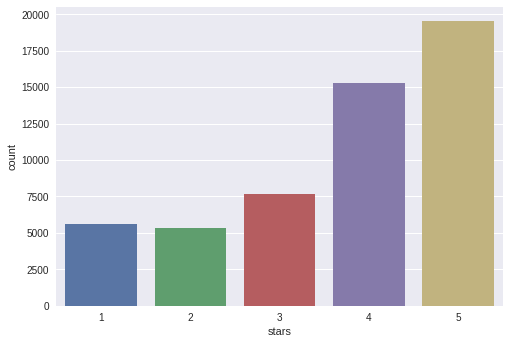

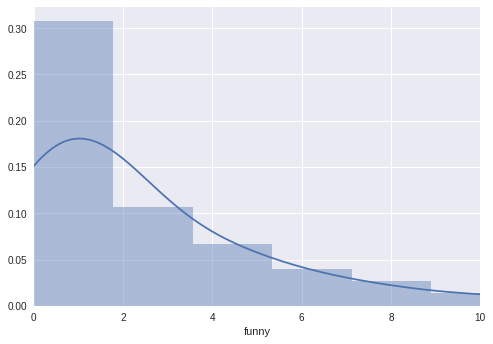

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(reviews['stars'])
plt.show()

sns.distplot(np.log(reviews['funny'].value_counts()))
plt.xlim(0,10)
plt.show()

In [38]:
reviews.describe()

,cool,funny,stars,useful
count,53425.000000,53425.000000,53425.000000,53425.000000
mean,0.516893,0.391802,3.708882,0.901320
std,2.075078,1.687110,1.328222,2.445244
min,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,3.000000,0.000000
50%,0.000000,0.000000,4.000000,0.000000
75%,0.000000,0.000000,5.000000,1.000000
max,234.000000,166.000000,5.000000,247.000000


## Latent semantic analysis


In [39]:
lsi = gensim.models.lsimodel.LsiModel(corpus=tfidf_corpus, id2word=trigram_dictionary, num_topics=250)


In [55]:
lsi.print_topics(12, num_words = 4)

[(0, '0.178*"great" + 0.166*"good" + 0.166*"place" + 0.163*"food"'),
 (1, '0.932*"pizza" + 0.088*"wing" + 0.080*"crust" + 0.075*"delivery"'),
 (2, '-0.553*"burger" + 0.320*"great" + 0.278*"sushi" + 0.176*"amazing"'),
 (3, '0.643*"burger" + 0.244*"great" + 0.186*"love" + -0.161*"table"'),
 (4, '-0.667*"sushi" + 0.241*"great" + -0.238*"roll" + -0.169*"fresh"'),
 (5, '0.438*"sushi" + -0.258*"chicken" + 0.256*"burger" + -0.194*"sandwich"'),
 (6, '0.287*"love" + 0.231*"breakfast" + 0.221*"sandwich" + -0.209*"steak"'),
 (7, '0.347*"love" + -0.291*"buffet" + -0.284*"price" + -0.251*"dim_sum"'),
 (8, '-0.348*"amazing" + -0.329*"love" + 0.277*"bar" + 0.253*"drink"'),
 (9,
  '-0.485*"breakfast" + -0.240*"buffet" + -0.229*"sandwich" + 0.206*"chicken"'),
 (10,
  '0.420*"love" + -0.269*"excellent" + -0.257*"sandwich" + -0.235*"lunch"'),
 (11, '0.520*"amazing" + 0.272*"wing" + -0.251*"love" + -0.240*"dim_sum"')]

In [54]:
print(trigram_phrases[10])

review = lsi[trigram_dictionary.doc2bow(trigram_phrases[10])]

sorted([topic for topic in review if topic[1] > .05], key = lambda topic: topic[1], reverse = True)[0:5]
      

['solid', 'place', 'eat', 'breakfast', 'tell', 'exactly', 'cook', 'example', 'scramble', 'eggs', 'bacon', 'crispy', 'burn', 'hash_brown', 'fry', 'burn', 'toast', 'actually', 'toast_butter', 'actually', 'order', 'exactly_expect', "this'll", 'ensure', 'good', 'want', 'price', 'want']


[(0, 1.2857529802409962),
 (11, 0.68602525925799818),
 (28, 0.61035514993147932),
 (58, 0.59944181976015143),
 (102, 0.57208235985318823)]

## Word vectors

In [42]:
w2vec = gensim.models.Word2Vec(trigram_phrases)

In [59]:
print(w2vec.similarity('france', 'spain'))

w2vec.most_similar(positive=['lunch_special', 'best'], negative=['chicken'], topn=3)

0.887468923731


[('bargain', 0.7741219401359558),
 ('quality_quantity', 0.7645257115364075),
 ('exception', 0.7468701601028442)]